In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback
import matplotlib.pyplot as plt

In [ ]:
def print_stats(predictions, labels):
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"F1 score = {f1}")
    return accuracy, precision, recall, f1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data.csv")

X = data.drop(columns=["Label"])
y = data["Label"]

In [ ]:
mi_scores_series = pd.read_csv("/content/drive/MyDrive/mutual_info_scores.csv")
selected_features = mi_scores_series["Unnamed: 0"].head(50).astype(str).tolist()
X_selected = X[selected_features]

In [ ]:
X_selected

,382,312,212,393,153,42,387,343,147,142,...,366,131,85,110,136,126,96,79,121,125
0,0.066068,0.411454,0.245572,0.003587,0.007834,0.253671,0.668037,0.001654,0.366240,0.150682,...,0.955758,0.170899,0.026165,4.346724e-09,0.041929,0.241374,3.257426e-09,2.833682e-08,0.046372,0.221903
1,0.063079,0.527124,0.256233,0.005701,0.007834,0.281632,0.669267,0.004444,0.415806,0.147972,...,0.945946,0.219764,0.044040,8.429562e-09,0.127906,0.272856,3.697932e-09,2.356186e-08,0.085571,0.290039
2,0.073593,0.402821,0.166668,0.003946,0.090942,0.222654,0.659058,0.007597,0.398024,0.189687,...,0.992491,0.217393,0.040482,6.627843e-09,0.137924,0.401772,2.998209e-09,2.280470e-08,0.113672,0.305905
3,0.080625,0.507993,0.210020,0.000965,0.142513,0.251791,0.650530,0.026047,0.368373,0.198325,...,0.987926,0.216739,0.038210,5.227681e-09,0.130644,0.611654,5.205970e-09,8.851257e-09,0.122844,0.441540
4,0.068298,0.083552,0.071891,0.574281,0.165131,0.149709,0.953516,0.090176,0.242961,0.077206,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183150,0.068298,0.083552,0.285017,0.013857,0.165131,0.630546,0.574298,0.090176,0.364288,0.593010,...,0.063760,0.071768,0.021626,3.269073e-09,0.115392,0.060606,2.636501e-08,1.491836e-02,0.256771,0.009696
183151,0.068298,0.083552,0.105218,0.013857,0.165131,0.292384,0.574298,0.090176,0.342597,0.355966,...,0.099506,0.028187,0.052627,1.016736e-08,0.067068,0.027456,2.030878e-08,1.494904e-02,0.110140,0.006327
183152,0.068298,0.083552,0.257441,0.013857,0.165131,0.780093,0.574298,0.090176,0.360577,0.575648,...,0.063762,0.072442,0.022036,3.523027e-09,0.115810,0.060221,1.972837e-08,1.466164e-02,0.187083,0.010425
183153,0.068298,0.083552,0.107247,0.013857,0.165131,0.260251,0.574298,0.090176,0.330181,0.299392,...,0.146775,0.080283,0.080355,1.509901e-08,0.226682,0.130484,4.956088e-08,1.471995e-02,0.400505,0.038005


In [ ]:
X_MI = X_selected

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

metrics = []
confusion_matrixs = []
rf = RandomForestClassifier(n_estimators=100, random_state=42)

for n_features in range(1, X_MI.shape[1] + 1):

    rfe = RFE(estimator=rf, n_features_to_select=n_features)
    X_selected = rfe.fit_transform(X_MI, y)

    selected_features = X_MI.columns[rfe.support_]
    print(selected_features)

    kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmeans.fit(X_selected)
    preds = kmeans.predict(X_selected)
    preds = [1 if pred == 0 else 0 for pred in preds]

    print(f"Number of Features: {n_features}")
    accuracy, precision, recall, f1 = print_stats(preds, y)

    conf_matrix = confusion_matrix(y, preds)
    confusion_matrixs.append({"n_feature": n_features, "conf": conf_matrix})
    print(conf_matrix)

    # Append metrics
    metrics.append({
        "n_features": n_features,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })


metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(f"rfe_kmeans.csv", index=False)

plt.figure(figsize=(12, 8))
plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker="o", label="Accuracy")
plt.plot(
    metrics_df["n_features"], metrics_df["precision"], marker="o", label="Precision"
)
plt.plot(metrics_df["n_features"], metrics_df["recall"], marker="o", label="Recall")
plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker="o", label="F1 Score")
plt.xlabel("Number of Features", fontsize=20)
plt.ylabel("Score", fontsize=20)
plt.title("Performance Metrics vs Number of Features", fontsize=20)
plt.legend(fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True)
plt.show()
plt.savefig(f"metrics_vs_features_rfe_kmeans.png")

Index(['86'], dtype='object')
Number of Features: 1
Accuracy = 0.9966367284540416
Precision = 0.9967988072268024
Recall = 0.9998240598196613
F1 score = 0.9983091416148796
[[   691    584]
 [    32 181848]]
Index(['101', '86'], dtype='object')
Number of Features: 2
Accuracy = 0.9987988315907291
Precision = 0.9990330307891787
Recall = 0.9997580822520343
F1 score = 0.9993954250162136
[[  1099    176]
 [    44 181836]]
Index(['101', '86', '130'], dtype='object')
Number of Features: 3
Accuracy = 0.9985476781960635
Precision = 0.9987586919029363
Recall = 0.9997800747745766
F1 score = 0.9992691223423255
[[  1049    226]
 [    40 181840]]
Index(['101', '86', '130', '136'], dtype='object')
Number of Features: 4
Accuracy = 0.9987333133138598
Precision = 0.9989287950867402
Recall = 0.9997965691664834
F1 score = 0.9993624937485918
[[  1080    195]
 [    37 181843]]
Index(['101', '86', '130', '131', '136'], dtype='object')
Number of Features: 5
Accuracy = 0.9986295760421501
Precision = 0.9988026254

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

metrics = []
confusion_matrixs = []
rf = RandomForestClassifier(n_estimators=100, random_state=42)

for n_features in range(7, X_MI.shape[1] + 1):

    rfe = RFE(estimator=rf, n_features_to_select=n_features)
    X_selected = rfe.fit_transform(X_MI, y)

    selected_features = X_MI.columns[rfe.support_]
    print(selected_features)

    kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmeans.fit(X_selected)
    preds = kmeans.predict(X_selected)
    preds = [1 if pred == 0 else 0 for pred in preds]

    print(f"Number of Features: {n_features}")
    accuracy, precision, recall, f1 = print_stats(preds, y)

    conf_matrix = confusion_matrix(y, preds)
    confusion_matrixs.append({"n_feature": n_features, "conf": conf_matrix})
    print(conf_matrix)

    # Append metrics
    metrics.append({
        "n_features": n_features,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })


metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(f"rfe_kmeans.csv", index=False)

plt.figure(figsize=(12, 8))
plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker="o", label="Accuracy")
plt.plot(
    metrics_df["n_features"], metrics_df["precision"], marker="o", label="Precision"
)
plt.plot(metrics_df["n_features"], metrics_df["recall"], marker="o", label="Recall")
plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker="o", label="F1 Score")
plt.xlabel("Number of Features", fontsize=20)
plt.ylabel("Score", fontsize=20)
plt.title("Performance Metrics vs Number of Features", fontsize=20)
plt.legend(fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True)
plt.show()
plt.savefig(f"metrics_vs_features_rfe_kmeans.png")

Index(['101', '86', '130', '131', '85', '136', '126'], dtype='object')
Number of Features: 7
Accuracy = 0.9986459556113674
Precision = 0.9988410032188252
Recall = 0.9997965691664834
F1 score = 0.9993185577604731
[[  1064    211]
 [    37 181843]]
Index(['42', '101', '86', '130', '131', '85', '136', '126'], dtype='object')
Number of Features: 8
Accuracy = 0.9620867571182878
Precision = 0.9928163348095062
Recall = 0.9688310974268749
F1 score = 0.980677081304297
[[     0   1275]
 [  5669 176211]]
Index(['42', '101', '86', '100', '130', '131', '85', '136', '126'], dtype='object')
Number of Features: 9
Accuracy = 0.9620867571182878
Precision = 0.9928163348095062
Recall = 0.9688310974268749
F1 score = 0.980677081304297
[[     0   1275]
 [  5669 176211]]
Index(['42', '365', '101', '86', '100', '130', '131', '85', '136', '126'], dtype='object')
Number of Features: 10
Accuracy = 0.9620867571182878
Precision = 0.9928163348095062
Recall = 0.9688310974268749
F1 score = 0.980677081304297
[[     0  

In [ ]:
# Khởi tạo danh sách metrics để lưu trữ dữ liệu
metrics = []

# Dữ liệu cho từng số lượng đặc trưng (features)
data = [
    {'n_features': 1, 'accuracy': 0.9966367284540416, 'precision': 0.9967988072268024, 'recall': 0.9998240598196613, 'f1_score': 0.9983091416148796},
    {'n_features': 2, 'accuracy': 0.9987988315907291, 'precision': 0.9990330307891787, 'recall': 0.9997580822520343, 'f1_score': 0.9993954250162136},
    {'n_features': 3, 'accuracy': 0.9985476781960635, 'precision': 0.9987586919029363, 'recall': 0.9997800747745766, 'f1_score': 0.9992691223423255},
    {'n_features': 4, 'accuracy': 0.9987333133138598, 'precision': 0.9989287950867402, 'recall': 0.9997965691664834, 'f1_score': 0.9993624937485918},
    {'n_features': 5, 'accuracy': 0.9986295760421501, 'precision': 0.9988026254359706, 'recall': 0.9998185616890257, 'f1_score': 0.9993103353528693},
    {'n_features': 6, 'accuracy': 0.9985968169037154, 'precision': 0.9987916270741447, 'recall': 0.9997965691664834, 'f1_score': 0.9992938454648118},
    {'n_features': 7, 'accuracy': 0.9986459556113674, 'precision': 0.9988410032188252, 'recall': 0.9997965691664834, 'f1_score': 0.9993185577604731},
    {'n_features': 8, 'accuracy': 0.9620867571182878, 'precision': 0.9928163348095062, 'recall': 0.9688310974268749, 'f1_score': 0.980677081304297},
    {'n_features': 9, 'accuracy': 0.9620867571182878, 'precision': 0.9928163348095062, 'recall': 0.9688310974268749, 'f1_score': 0.980677081304297},
    {'n_features': 10, 'accuracy': 0.9620867571182878, 'precision': 0.9928163348095062, 'recall': 0.9688310974268749, 'f1_score': 0.980677081304297}
]
metrics.extend(data)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

metrics = []
confusion_matrixs = []
rf = RandomForestClassifier(n_estimators=100, random_state=42)

for n_features in range(11, X_MI.shape[1] + 1):

    rfe = RFE(estimator=rf, n_features_to_select=n_features)
    X_selected = rfe.fit_transform(X_MI, y)

    selected_features = X_MI.columns[rfe.support_]
    print(selected_features)

    kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmeans.fit(X_selected)
    preds = kmeans.predict(X_selected)
    preds = [1 if pred == 0 else 0 for pred in preds]

    print(f"Number of Features: {n_features}")
    accuracy, precision, recall, f1 = print_stats(preds, y)

    conf_matrix = confusion_matrix(y, preds)
    confusion_matrixs.append({"n_feature": n_features, "conf": conf_matrix})
    print(conf_matrix)

    # Append metrics
    metrics.append({
        "n_features": n_features,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })


metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(f"rfe_kmeans.csv", index=False)

plt.figure(figsize=(12, 8))
plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker="o", label="Accuracy")
plt.plot(
    metrics_df["n_features"], metrics_df["precision"], marker="o", label="Precision"
)
plt.plot(metrics_df["n_features"], metrics_df["recall"], marker="o", label="Recall")
plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker="o", label="F1 Score")
plt.xlabel("Number of Features", fontsize=20)
plt.ylabel("Score", fontsize=20)
plt.title("Performance Metrics vs Number of Features", fontsize=20)
plt.legend(fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True)
plt.show()
plt.savefig(f"metrics_vs_features_rfe_kmeans.png")

Index(['42', '187', '365', '101', '86', '100', '130', '131', '85', '136',
       '126'],
      dtype='object')
Number of Features: 11
Accuracy = 0.9623379105129535
Precision = 0.9928181961561859
Recall = 0.9690840114361117
F1 score = 0.9808075412061923
[[     0   1275]
 [  5623 176257]]
Index(['42', '187', '365', '101', '86', '100', '130', '366', '131', '85',
       '136', '126'],
      dtype='object')
Number of Features: 12
Accuracy = 0.9623433703693592
Precision = 0.9928182366095317
Recall = 0.9690895095667473
F1 score = 0.9808103769201448
[[     0   1275]
 [  5622 176258]]
Index(['42', '187', '365', '101', '86', '100', '130', '366', '131', '85',
       '136', '126', '79'],
      dtype='object')
Number of Features: 13
Accuracy = 0.9623433703693592
Precision = 0.9928182366095317
Recall = 0.9690895095667473
F1 score = 0.9808103769201448
[[     0   1275]
 [  5622 176258]]
Index(['42', '337', '187', '365', '101', '86', '100', '130', '366', '131',
       '85', '136', '126', '79'],
      d

In [ ]:
metrics = [
     {'n_features': 1, 'accuracy': 0.9966367284540416, 'precision': 0.9967988072268024, 'recall': 0.9998240598196613, 'f1_score': 0.9983091416148796},
    {'n_features': 2, 'accuracy': 0.9987988315907291, 'precision': 0.9990330307891787, 'recall': 0.9997580822520343, 'f1_score': 0.9993954250162136},
    {'n_features': 3, 'accuracy': 0.9985476781960635, 'precision': 0.9987586919029363, 'recall': 0.9997800747745766, 'f1_score': 0.9992691223423255},
    {'n_features': 4, 'accuracy': 0.9987333133138598, 'precision': 0.9989287950867402, 'recall': 0.9997965691664834, 'f1_score': 0.9993624937485918},
    {'n_features': 5, 'accuracy': 0.9986295760421501, 'precision': 0.9988026254359706, 'recall': 0.9998185616890257, 'f1_score': 0.9993103353528693},
    {'n_features': 6, 'accuracy': 0.9985968169037154, 'precision': 0.9987916270741447, 'recall': 0.9997965691664834, 'f1_score': 0.9992938454648118},
    {'n_features': 7, 'accuracy': 0.9986459556113674, 'precision': 0.9988410032188252, 'recall': 0.9997965691664834, 'f1_score': 0.9993185577604731},
    {'n_features': 8, 'accuracy': 0.9620867571182878, 'precision': 0.9928163348095062, 'recall': 0.9688310974268749, 'f1_score': 0.980677081304297},
    {'n_features': 9, 'accuracy': 0.9620867571182878, 'precision': 0.9928163348095062, 'recall': 0.9688310974268749, 'f1_score': 0.980677081304297},
    {'n_features': 10, 'accuracy': 0.9620867571182878, 'precision': 0.9928163348095062, 'recall': 0.9688310974268749, 'f1_score': 0.980677081304297},
    {"n_features": 11, "accuracy": 0.9623379105129535, "precision": 0.9928181961561859, "recall": 0.9690840114361117, "f1_score": 0.9808075412061923},
    {"n_features": 12, "accuracy": 0.9623433703693592, "precision": 0.9928182366095317, "recall": 0.9690895095667473, "f1_score": 0.9808103769201448},
    {"n_features": 13, "accuracy": 0.9623433703693592, "precision": 0.9928182366095317, "recall": 0.9690895095667473, "f1_score": 0.9808103769201448},
    {"n_features": 14, "accuracy": 0.9624689470666922, "precision": 0.9928191669107211, "recall": 0.9692159665713658, "f1_score": 0.9808755939861339},
    {"n_features": 15, "accuracy": 0.9618574431492452, "precision": 0.9928146344762291, "recall": 0.9686001759401803, "f1_score": 0.9805579365697811},
    {"n_features": 16, "accuracy": 0.9618574431492452, "precision": 0.9928146344762291, "recall": 0.9686001759401803, "f1_score": 0.9805579365697811},
    {"n_features": 17, "accuracy": 0.9613169173650733, "precision": 0.992810623361245, "recall": 0.9680558610072575, "f1_score": 0.9802769851764215},
    {"n_features": 18, "accuracy": 0.9613169173650733, "precision": 0.992810623361245, "recall": 0.9680558610072575, "f1_score": 0.9802769851764215},
    {"n_features": 19, "accuracy": 0.9612459392317982, "precision": 0.9928100963165136, "recall": 0.9679843853089949, "f1_score": 0.9802400810663341},
    {"n_features": 20, "accuracy": 0.03885233818350577, "precision": 0.999828855040219, "recall": 0.03212007917308115, "f1_score": 0.062240641796689804},
    {"n_features": 21, "accuracy": 0.03882503890147689, "precision": 0.9998287084618019, "recall": 0.03209258851990323, "f1_score": 0.062189028223185845},
    {"n_features": 22, "accuracy": 0.03882503890147689, "precision": 0.9998287084618019, "recall": 0.03209258851990323, "f1_score": 0.062189028223185845},
    {"n_features": 23, "accuracy": 0.9612240998061751, "precision": 0.9928154923699852, "recall": 0.967956894655817, "f1_score": 0.9802286153349331},
    {"n_features": 24, "accuracy": 0.9595752231716306, "precision": 0.9928143712574851, "recall": 0.9662854629425995, "f1_score": 0.9793702981331848},
    {"n_features": 25, "accuracy": 0.9590838360951107, "precision": 0.9928107161024133, "recall": 0.965790631185397, "f1_score": 0.9791142944733982},
    {"n_features": 26, "accuracy": 0.9590838360951107, "precision": 0.9928107161024133, "recall": 0.965790631185397, "f1_score": 0.9791142944733982},
    {"n_features": 27, "accuracy": 0.9572056454915235, "precision": 0.9928190374791876, "recall": 0.9638772817242137, "f1_score": 0.9781341189204872},
    {"n_features": 28, "accuracy": 0.9571565067838715, "precision": 0.9928354185191688, "recall": 0.9638113041565868, "f1_score": 0.9781080952899066}
]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

metrics = []
confusion_matrixs = []
rf = RandomForestClassifier(n_estimators=100, random_state=42)

for n_features in range(29, X_MI.shape[1] + 1):

    rfe = RFE(estimator=rf, n_features_to_select=n_features)
    X_selected = rfe.fit_transform(X_MI, y)

    selected_features = X_MI.columns[rfe.support_]
    print(selected_features)

    kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmeans.fit(X_selected)
    preds = kmeans.predict(X_selected)
    preds = [1 if pred == 0 else 0 for pred in preds]

    print(f"Number of Features: {n_features}")
    accuracy, precision, recall, f1 = print_stats(preds, y)

    conf_matrix = confusion_matrix(y, preds)
    confusion_matrixs.append({"n_feature": n_features, "conf": conf_matrix})
    print(conf_matrix)

    # Append metrics
    metrics.append({
        "n_features": n_features,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })


metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(f"rfe_kmeans.csv", index=False)

plt.figure(figsize=(12, 8))
plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker="o", label="Accuracy")
plt.plot(
    metrics_df["n_features"], metrics_df["precision"], marker="o", label="Precision"
)
plt.plot(metrics_df["n_features"], metrics_df["recall"], marker="o", label="Recall")
plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker="o", label="F1 Score")
plt.xlabel("Number of Features", fontsize=20)
plt.ylabel("Score", fontsize=20)
plt.title("Performance Metrics vs Number of Features", fontsize=20)
plt.legend(fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True)
plt.show()
plt.savefig(f"metrics_vs_features_rfe_kmeans.png")

Index(['312', '212', '42', '147', '22', '62', '302', '47', '52', '313', '337',
       '187', '232', '327', '172', '365', '297', '101', '86', '100', '130',
       '366', '131', '85', '136', '126', '79', '121', '125'],
      dtype='object')
Number of Features: 29
Accuracy = 0.9571565067838715
Precision = 0.9928354185191688
Recall = 0.9638113041565868
F1 score = 0.9781080952899066
[[    10   1265]
 [  6582 175298]]
Index(['312', '212', '42', '147', '22', '62', '302', '47', '267', '52', '313',
       '337', '187', '232', '327', '172', '365', '297', '101', '86', '100',
       '130', '366', '131', '85', '136', '126', '79', '121', '125'],
      dtype='object')
Number of Features: 30
Accuracy = 0.9553056154623133
Precision = 0.9928663851811496
Recall = 0.9619034528260392
F1 score = 0.977139697504524
[[    18   1257]
 [  6929 174951]]
Index(['312', '212', '153', '42', '147', '22', '62', '302', '47', '267', '52',
       '313', '337', '187', '232', '327', '172', '365', '297', '101', '86',
       

Index(['312', '212', '153', '42', '147', '227', '22', '62', '302', '47', '267',
       '52', '383', '313', '337', '187', '232', '327', '172', '365', '297',
       '101', '86', '117', '100', '57', '130', '366', '131', '85', '136',
       '126', '79', '121', '125'],
      dtype='object')
Number of Features: 35
Accuracy = 0.04581365510087085
Precision = 0.9981797815737888
Recall = 0.039196173301077636
F1 score = 0.0754303731840738
[[  1262     13]
 [174751   7129]]
Index(['312', '212', '153', '42', '147', '142', '227', '22', '62', '302', '47',
       '267', '52', '383', '313', '337', '187', '232', '327', '172', '365',
       '297', '101', '86', '117', '100', '57', '130', '366', '131', '85',
       '136', '126', '79', '121', '125'],
      dtype='object')
Number of Features: 36
Accuracy = 0.047326035325270945
Precision = 0.996507723304231
Recall = 0.04079063118539696
F1 score = 0.07837316783309124
[[  1249     26]
 [174461   7419]]
Index(['312', '212', '153', '42', '147', '142', '342', '227

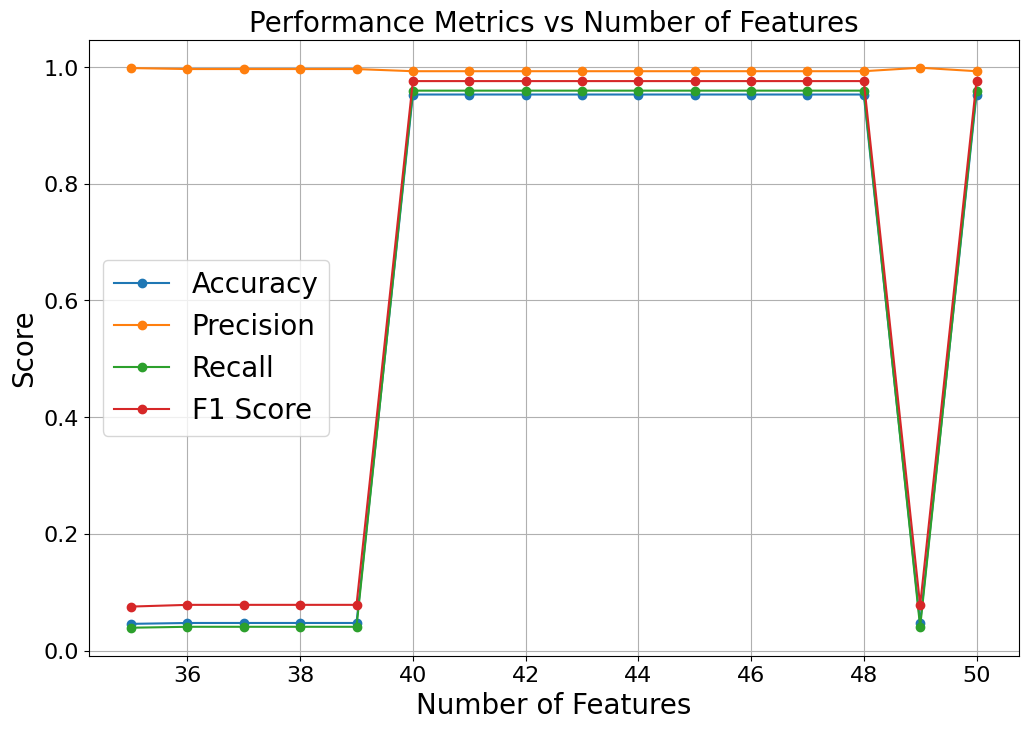

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

metrics = []
confusion_matrixs = []
rf = RandomForestClassifier(n_estimators=100, random_state=42)

for n_features in range(35, X_MI.shape[1] + 1):

    rfe = RFE(estimator=rf, n_features_to_select=n_features)
    X_selected = rfe.fit_transform(X_MI, y)

    selected_features = X_MI.columns[rfe.support_]
    print(selected_features)

    kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmeans.fit(X_selected)
    preds = kmeans.predict(X_selected)
    preds = [1 if pred == 0 else 0 for pred in preds]

    print(f"Number of Features: {n_features}")
    accuracy, precision, recall, f1 = print_stats(preds, y)

    conf_matrix = confusion_matrix(y, preds)
    confusion_matrixs.append({"n_feature": n_features, "conf": conf_matrix})
    print(conf_matrix)

    # Append metrics
    metrics.append({
        "n_features": n_features,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })


metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(f"rfe_kmeans.csv", index=False)

plt.figure(figsize=(12, 8))
plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker="o", label="Accuracy")
plt.plot(
    metrics_df["n_features"], metrics_df["precision"], marker="o", label="Precision"
)
plt.plot(metrics_df["n_features"], metrics_df["recall"], marker="o", label="Recall")
plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker="o", label="F1 Score")
plt.xlabel("Number of Features", fontsize=20)
plt.ylabel("Score", fontsize=20)
plt.title("Performance Metrics vs Number of Features", fontsize=20)
plt.legend(fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True)
plt.show()
plt.savefig(f"metrics_vs_features_rfe_kmeans.png")

In [ ]:


metrics = [
    {'n_features': 1, 'accuracy': 0.9966367284540416, 'precision': 0.9967988072268024, 'recall': 0.9998240598196613, 'f1_score': 0.9983091416148796},
    {'n_features': 2, 'accuracy': 0.9987988315907291, 'precision': 0.9990330307891787, 'recall': 0.9997580822520343, 'f1_score': 0.9993954250162136},
    {'n_features': 3, 'accuracy': 0.9985476781960635, 'precision': 0.9987586919029363, 'recall': 0.9997800747745766, 'f1_score': 0.9992691223423255},
    {'n_features': 4, 'accuracy': 0.9987333133138598, 'precision': 0.9989287950867402, 'recall': 0.9997965691664834, 'f1_score': 0.9993624937485918},
    {'n_features': 5, 'accuracy': 0.9986295760421501, 'precision': 0.9988026254359706, 'recall': 0.9998185616890257, 'f1_score': 0.9993103353528693},
    {'n_features': 6, 'accuracy': 0.9985968169037154, 'precision': 0.9987916270741447, 'recall': 0.9997965691664834, 'f1_score': 0.9992938454648118},
    {'n_features': 7, 'accuracy': 0.9986459556113674, 'precision': 0.9988410032188252, 'recall': 0.9997965691664834, 'f1_score': 0.9993185577604731},
    {'n_features': 8, 'accuracy': 0.9620867571182878, 'precision': 0.9928163348095062, 'recall': 0.9688310974268749, 'f1_score': 0.980677081304297},
    {'n_features': 9, 'accuracy': 0.9620867571182878, 'precision': 0.9928163348095062, 'recall': 0.9688310974268749, 'f1_score': 0.980677081304297},
    {'n_features': 10, 'accuracy': 0.9620867571182878, 'precision': 0.9928163348095062, 'recall': 0.9688310974268749, 'f1_score': 0.980677081304297},
    {"n_features": 11, "accuracy": 0.9623379105129535, "precision": 0.9928181961561859, "recall": 0.9690840114361117, "f1_score": 0.9808075412061923},
    {"n_features": 12, "accuracy": 0.9623433703693592, "precision": 0.9928182366095317, "recall": 0.9690895095667473, "f1_score": 0.9808103769201448},
    {"n_features": 13, "accuracy": 0.9623433703693592, "precision": 0.9928182366095317, "recall": 0.9690895095667473, "f1_score": 0.9808103769201448},
    {"n_features": 14, "accuracy": 0.9624689470666922, "precision": 0.9928191669107211, "recall": 0.9692159665713658, "f1_score": 0.9808755939861339},
    {"n_features": 15, "accuracy": 0.9618574431492452, "precision": 0.9928146344762291, "recall": 0.9686001759401803, "f1_score": 0.9805579365697811},
    {"n_features": 16, "accuracy": 0.9618574431492452, "precision": 0.9928146344762291, "recall": 0.9686001759401803, "f1_score": 0.9805579365697811},
    {"n_features": 17, "accuracy": 0.9613169173650733, "precision": 0.992810623361245, "recall": 0.9680558610072575, "f1_score": 0.9802769851764215},
    {"n_features": 18, "accuracy": 0.9613169173650733, "precision": 0.992810623361245, "recall": 0.9680558610072575, "f1_score": 0.9802769851764215},
    {"n_features": 19, "accuracy": 0.9612459392317982, "precision": 0.9928100963165136, "recall": 0.9679843853089949, "f1_score": 0.9802400810663341},
    {"n_features": 20, "accuracy": 0.03885233818350577, "precision": 0.999828855040219, "recall": 0.03212007917308115, "f1_score": 0.062240641796689804},
    {"n_features": 21, "accuracy": 0.03882503890147689, "precision": 0.9998287084618019, "recall": 0.03209258851990323, "f1_score": 0.062189028223185845},
    {"n_features": 22, "accuracy": 0.03882503890147689, "precision": 0.9998287084618019, "recall": 0.03209258851990323, "f1_score": 0.062189028223185845},
    {"n_features": 23, "accuracy": 0.9612240998061751, "precision": 0.9928154923699852, "recall": 0.967956894655817, "f1_score": 0.9802286153349331},
    {"n_features": 24, "accuracy": 0.9595752231716306, "precision": 0.9928143712574851, "recall": 0.9662854629425995, "f1_score": 0.9793702981331848},
    {"n_features": 25, "accuracy": 0.9590838360951107, "precision": 0.9928107161024133, "recall": 0.965790631185397, "f1_score": 0.9791142944733982},
    {"n_features": 26, "accuracy": 0.9590838360951107, "precision": 0.9928107161024133, "recall": 0.965790631185397, "f1_score": 0.9791142944733982},
    {"n_features": 27, "accuracy": 0.9572056454915235, "precision": 0.9928190374791876, "recall": 0.9638772817242137, "f1_score": 0.9781341189204872},
    {"n_features": 28, "accuracy": 0.9571565067838715, "precision": 0.9928354185191688, "recall": 0.9638113041565868, "f1_score": 0.9781080952899066},

    {'n_features': 29, 'accuracy': 0.9571565067838715, 'precision': 0.9928354185191688, 'recall': 0.9638113041565868, 'f1_score': 0.9781080952899066, },
    {'n_features': 30, 'accuracy': 0.9553056154623133, 'precision': 0.9928663851811496, 'recall': 0.9619034528260392, 'f1_score': 0.977139697504524, },
    {'n_features': 31, 'accuracy': 0.9553056154623133, 'precision': 0.9928663851811496, 'recall': 0.9619034528260392, 'f1_score': 0.977139697504524, },
    {'n_features': 32, 'accuracy': 0.9545357757090989, 'precision': 0.9928886667386131, 'recall': 0.9611007257532439, 'f1_score': 0.9767361295423497},
    {'n_features': 33, 'accuracy': 0.9543938194425486, 'precision': 0.9928876163857502, 'recall': 0.9609577743567187, 'f1_score': 0.9766617958095728, },

    {'n_features': 34, 'accuracy': 0.04581365510087085, 'precision': 0.9981797815737888, 'recall': 0.039196173301077636, 'f1_score': 0.0754303731840738, },
    {'n_features': 35, 'accuracy': 0.04581365510087085, 'precision': 0.9981797815737888, 'recall': 0.039196173301077636, 'f1_score': 0.0754303731840738,},
    {'n_features': 35, 'accuracy': 0.04581365510087085, 'precision': 0.9981797815737888, 'recall': 0.039196173301077636, 'f1_score': 0.06716351634389825},
    {'n_features': 36, 'accuracy': 0.047326035325270945, 'precision': 0.996507723304231, 'recall': 0.04079063118539696, 'f1_score': 0.07238057747701753},
    {'n_features': 37, 'accuracy': 0.047336955038082495, 'precision': 0.9965086612058547, 'recall': 0.04080162744666813, 'f1_score': 0.07238643145776223},
    {'n_features': 38, 'accuracy': 0.047336955038082495, 'precision': 0.9965086612058547, 'recall': 0.04080162744666813, 'f1_score': 0.07238643145776223},
    {'n_features': 39, 'accuracy': 0.047336955038082495, 'precision': 0.9965086612058547, 'recall': 0.04080162744666813, 'f1_score': 0.07238643145776223},
    {'n_features': 40, 'accuracy': 0.952870519505337, 'precision': 0.9927978154511321, 'recall': 0.959500769738289, 'f1_score': 0.9767954947797205},
    {'n_features': 41, 'accuracy': 0.952870519505337, 'precision': 0.9927978154511321, 'recall': 0.959500769738289, 'f1_score': 0.9767954947797205},
    {'n_features': 42, 'accuracy': 0.952870519505337, 'precision': 0.9927978154511321, 'recall': 0.959500769738289, 'f1_score': 0.9767954947797205},
    {'n_features': 43, 'accuracy': 0.952870519505337, 'precision': 0.9927978154511321, 'recall': 0.959500769738289, 'f1_score': 0.9767954947797205},
    {'n_features': 44, 'accuracy': 0.952870519505337, 'precision': 0.9927978154511321, 'recall': 0.959500769738289, 'f1_score': 0.9767954947797205},
    {'n_features': 45, 'accuracy': 0.952870519505337, 'precision': 0.9927978154511321, 'recall': 0.959500769738289, 'f1_score': 0.9767954947797205},
    {'n_features': 46, 'accuracy': 0.952870519505337, 'precision': 0.9927978154511321, 'recall': 0.959500769738289, 'f1_score': 0.9767954947797205},
    {'n_features': 47, 'accuracy': 0.952870519505337, 'precision': 0.9927978154511321, 'recall': 0.959500769738289, 'f1_score': 0.9767954947797205},
    {'n_features': 48, 'accuracy': 0.952870519505337, 'precision': 0.9927978154511321, 'recall': 0.959500769738289, 'f1_score': 0.9767954947797205},
    {'n_features': 49, 'accuracy': 0.04712948049466299, 'precision': 0.9987796610169491, 'recall': 0.04683848148844657, 'f1_score': 0.08805682854796573},
    {'n_features': 50, 'accuracy': 0.952870519505337, 'precision': 0.9927978154511321, 'recall': 0.959500769738289, 'f1_score': 0.9767954947797205}
]


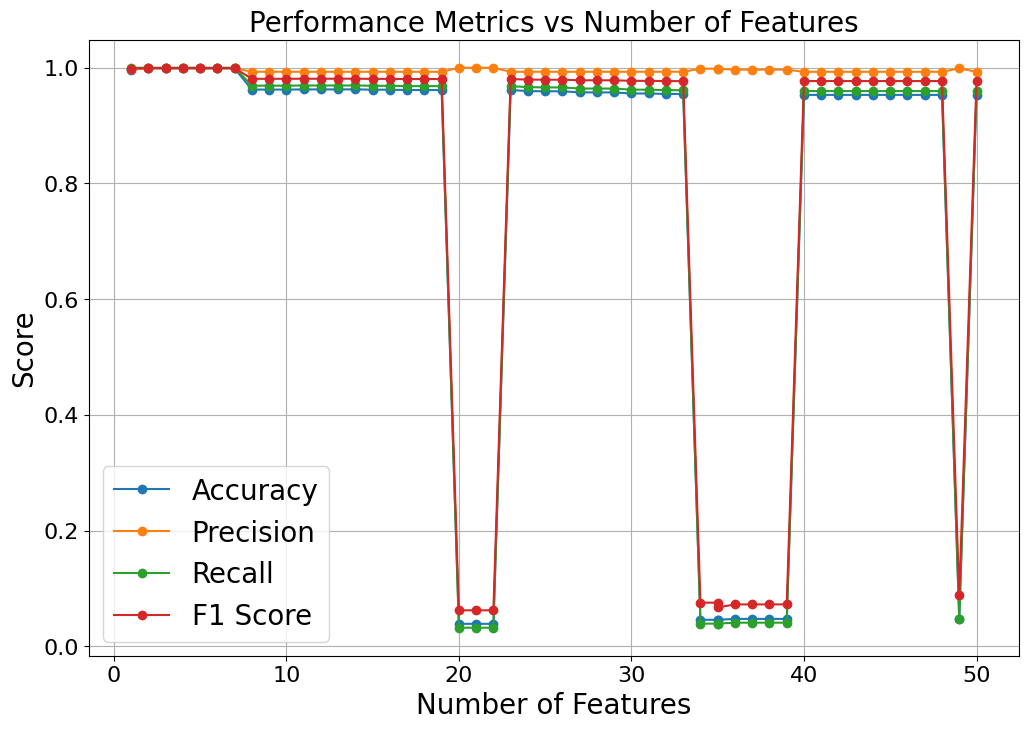

<Figure size 640x480 with 0 Axes>

In [ ]:
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(f"rfe_kmeans.csv", index=False)

plt.figure(figsize=(12, 8))
plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker="o", label="Accuracy")
plt.plot(
    metrics_df["n_features"], metrics_df["precision"], marker="o", label="Precision"
)
plt.plot(metrics_df["n_features"], metrics_df["recall"], marker="o", label="Recall")
plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker="o", label="F1 Score")
plt.xlabel("Number of Features", fontsize=20)
plt.ylabel("Score", fontsize=20)
plt.title("Performance Metrics vs Number of Features", fontsize=20)
plt.legend(fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True)
plt.show()
plt.savefig(f"metrics_vs_features_rfe_kmeans.png")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

metrics = []
confusion_matrixs = []
rf = RandomForestClassifier(n_estimators=100, random_state=42)

for n_features in range(15, X_MI.shape[1] + 1):

    rfe = RFE(estimator=rf, n_features_to_select=n_features)
    X_selected = rfe.fit_transform(X_MI, y)


    selected_features = X_MI.columns[rfe.support_]
    print(selected_features)

    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=42
    )

    n_components = min(20, X_test.shape[1])
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(X_test)
    reduced_df = pd.DataFrame(reduced_data, columns=[f'Component {i+1}' for i in range(n_components)])

    oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)
    oc_svm.fit(reduced_df)
    y_pred = oc_svm.predict(reduced_df)
    y_pred = [0 if x == -1 else 1 for x in y_pred]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix= confusion_matrix(y_test, y_pred)
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"F1 score = {f1}")


    confusion_matrixs.append({"n_feature": n_features, "conf": conf_matrix})
    print(conf_matrix)

    # Append metrics
    metrics.append({
        "n_features": n_features,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })


metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(f"rfe_kmeans.csv", index=False)

plt.figure(figsize=(12, 8))
plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker="o", label="Accuracy")
plt.plot(
    metrics_df["n_features"], metrics_df["precision"], marker="o", label="Precision"
)
plt.plot(metrics_df["n_features"], metrics_df["recall"], marker="o", label="Recall")
plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker="o", label="F1 Score")
plt.xlabel("Number of Features", fontsize=20)
plt.ylabel("Score", fontsize=20)
plt.title("Performance Metrics vs Number of Features", fontsize=20)
plt.legend(fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True)
plt.show()
plt.savefig(f"metrics_vs_features_rfe_kmeans.png")